In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tnfemesh.domain import (Curve,
                             Line2D,
                             CircularArc2D,
                             ParametricCurve2D,
                             VertexConnection2D,
                             CurveConnection,
                             DirichletBoundary2D,
                             Domain2D)

Line2D(start=(0, 0), end=(1, 1))
CircularArc2D(center=(0, 0), radius=1, start_angle=1.5707963267948966, angle_sweep=1.5707963267948966)
ParametricCurve2D(x_func=<function <lambda> at 0xffff515612d0>, y_func=<function <lambda> at 0xffff51561480>)


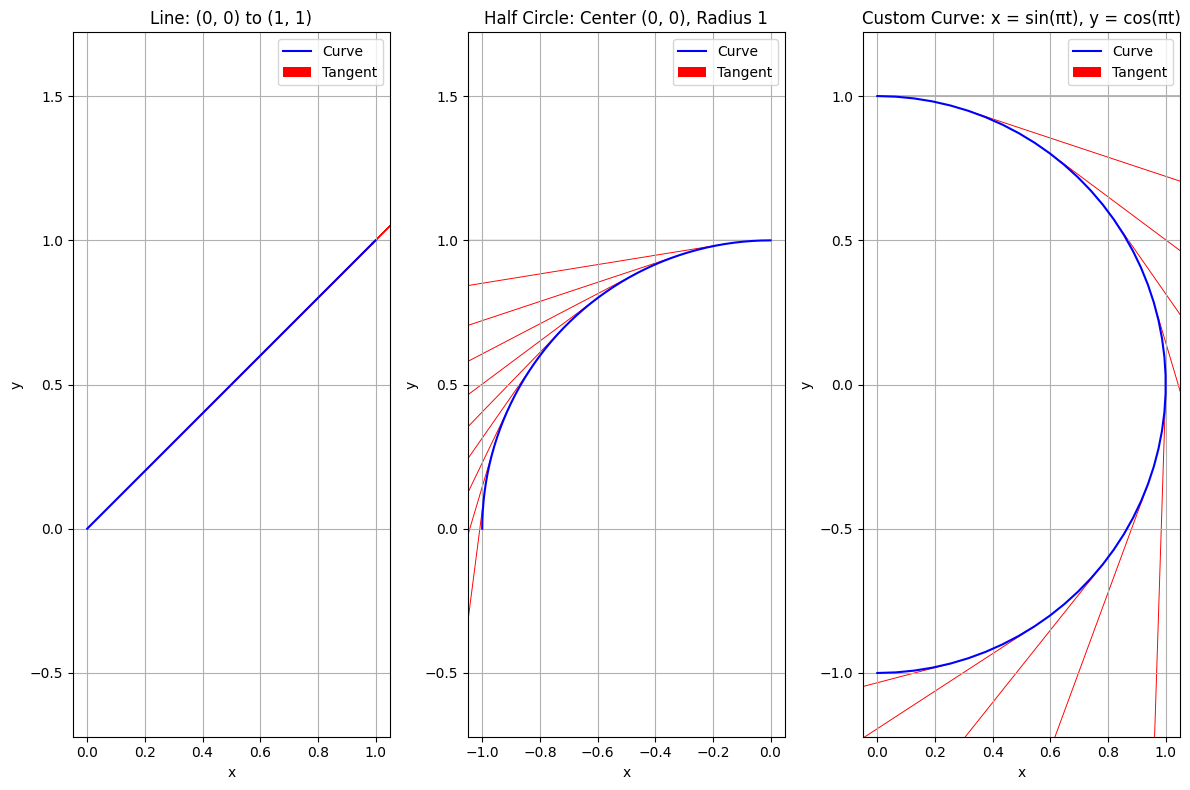

In [2]:
def plot_curve_with_tangents(curve, title, num_points=50):
    """
    Plot a curve and its tangent vectors on a 2D plane.

    Args:
        curve (Curve): An instance of a Curve object.
        title (str): Title of the plot.
        num_points (int): Number of points to sample along the curve.
    """
    # Sample points along the curve
    t_vals = np.linspace(0, 1, num_points)
    points = curve.evaluate(t_vals)
    tangents = curve.tangent(t_vals)

    # Plot the curve
    plt.plot(points[:, 0], points[:, 1], label="Curve", color="blue")

    # Plot tangent vectors
    for i in range(0, num_points, max(1, num_points // 10)):  # Fewer vectors for clarity
        p = points[i]
        t = tangents[i]
        plt.quiver(
            p[0], p[1], t[0], t[1],
            angles='xy', scale_units='xy', scale=1.0, color='red', width=0.003, label="Tangent" if i == 0 else ""
        )

    # Plot setup
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.legend()
    plt.grid()

# Create instances of different curves
line = Line2D((0, 0), (1, 1))
circular_arc = CircularArc2D((0, 0), 1, np.pi/2., 0.5*np.pi)
custom_curve = ParametricCurve2D(lambda t: np.sin(t * np.pi), lambda t: np.cos(t * np.pi))

print(line)
print(circular_arc)
print(custom_curve)

# Plot each curve
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plot_curve_with_tangents(line, "Line: (0, 0) to (1, 1)")

plt.subplot(1, 3, 2)
plot_curve_with_tangents(circular_arc, "Half Circle: Center (0, 0), Radius 1")

plt.subplot(1, 3, 3)
plot_curve_with_tangents(custom_curve, "Custom Curve: x = sin(πt), y = cos(πt)")

plt.tight_layout()
plt.show()


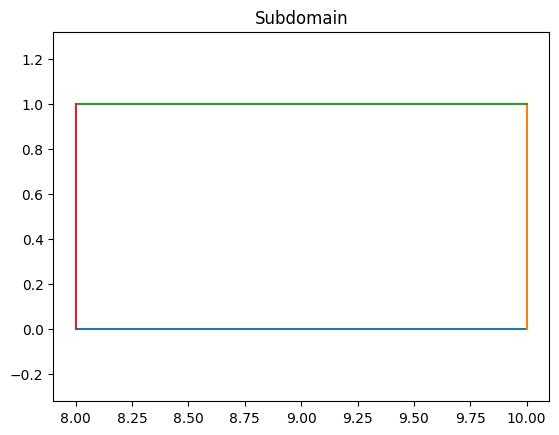

In [3]:
from tnfemesh.domain import RectangleFactory, QuadFactory

rectangle = RectangleFactory.create((8, 0), (10, 1))
rectangle.plot()

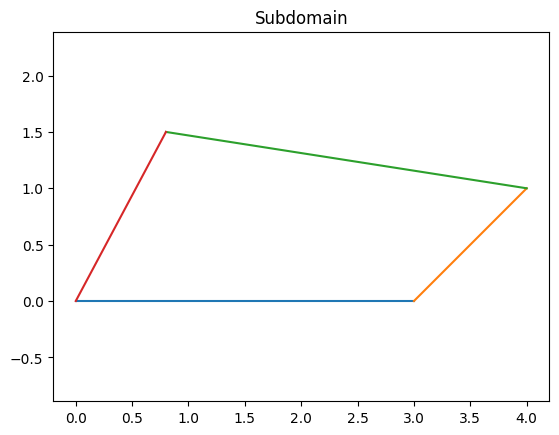

In [4]:
p1 = (0, 0)
p2 = (3, 0)
p3 = (4, 1)
p4 = (0.8, 1.5)

quad1 = QuadFactory.create(p1, p2, p3, p4)
quad1.plot()

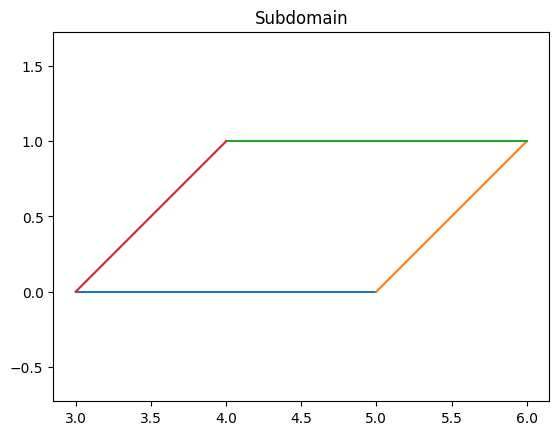

Subdomain2D(type=quadrilateral, num_curves=4)


In [5]:
p1 = (3, 0)
p2 = (5, 0)
p3 = (6, 1)
p4 = (4, 1)

quad2 = QuadFactory.create(p1, p2, p3, p4)
quad2.plot()
print(quad2)

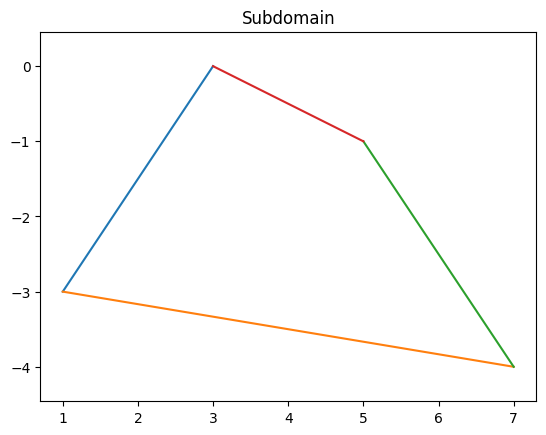

In [6]:
p1 = (3, 0)
p2 = (1, -3)
p3 = (7, -4)
p4 = (5, -1)

quad3 = QuadFactory.create(p1, p2, p3, p4)
quad3.plot()


Domain(4 subdomains, 2 connections)


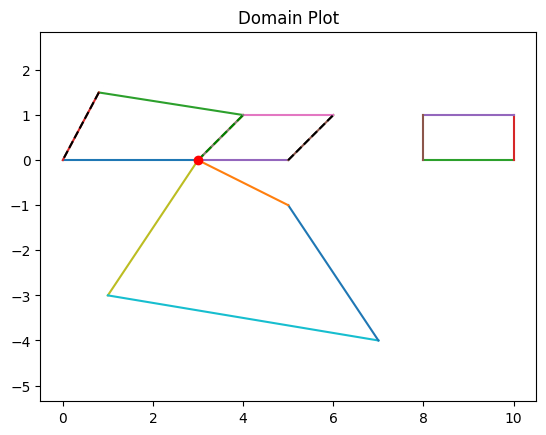

Domain(4 subdomains, 2 connections)
DirichletBoundary2D(num_bcs=2)


In [7]:
domain_idxs = [0, 1]
curve_idxs = [1, 3]
edge = CurveConnection(domain_idxs, curve_idxs)

vertex_idxs = [(0, 1, "start"), (1, 3, "end"), (2, 3, "end")]
vertex = VertexConnection2D(vertex_idxs)

bc = DirichletBoundary2D([(0, 3), (1, 1)])

domain = Domain2D([quad1, quad2, quad3, rectangle], [edge, vertex], bc)
print(domain)
domain.plot()
print(domain)
print(bc)

In [8]:
from tnfemesh.quadrature import GaussLegendre

order = 2
dimension = 2

points, weights = GaussLegendre.compute(order, dimension)
print("Gauss-Legendre points:")
print(points)
print("Gauss-Legendre weights:")
print(weights)

Gauss-Legendre points:
[[-0.57735027 -0.57735027]
 [-0.57735027  0.57735027]
 [ 0.57735027 -0.57735027]
 [ 0.57735027  0.57735027]]
Gauss-Legendre weights:
[1. 1. 1. 1.]


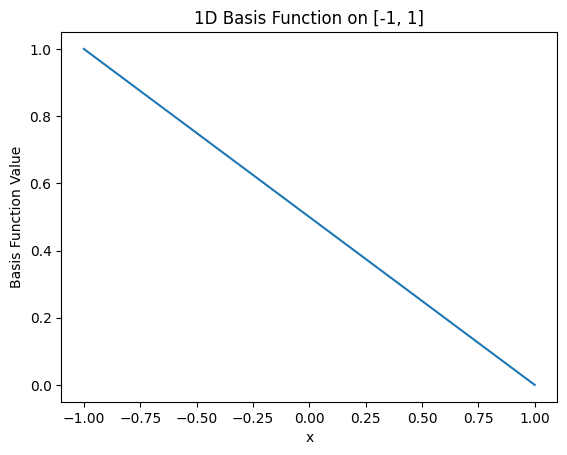

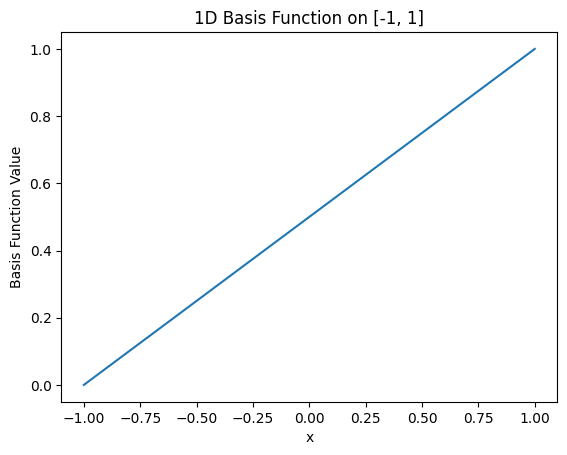

In [9]:
from tnfemesh.basis import LinearBasis1D, TensorProductBasis
basis1d = LinearBasis1D()

# Plot the basis functions
for i in range(2):
    basis1d.plot(i)

TensorProductBasis(dim=3)


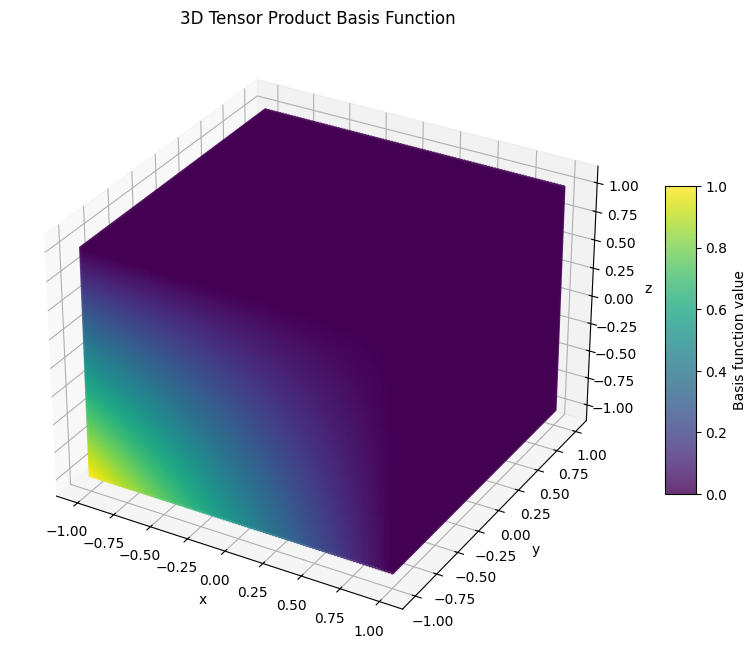

In [11]:
tpbasis = TensorProductBasis([basis1d]*3)

print(tpbasis)
tpbasis.plot((0, 0, 0))